# Perceptron

In [1]:
import numpy as np
import pandas as pd
import itertools
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pickle

# Environment settings
data_path = 'Data/'

# Deserialize previously saved data from "preprocessing"
with open(data_path+'train_pp.obj', 'rb') as train_pp, \
open(data_path+'test_pp.obj', 'rb') as test_pp:
    df_train = pickle.load(train_pp)
    df_test = pickle.load(test_pp)


In [2]:
X_train = df_train.drop(["Survived"], axis=1)
y_train = df_train["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, random_state=1, test_size=0.30)


In [3]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
perceptron = Perceptron( max_iter=50, eta0 = 0.01, random_state=0)
perceptron.fit(X_train, y_train) 
predicted = perceptron.predict(X_test)

In [5]:
#accuracy
accuracy_score (y_test, predicted)

0.7835820895522388

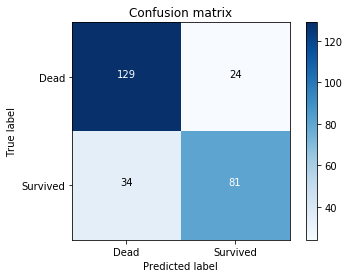

In [6]:
#confusion matrix
cm=confusion_matrix(y_test, predicted)
plt.figure()
plt.imshow(cm, cmap= plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.xticks([0,1], ['Dead', 'Survived'])
plt.yticks([0,1], ['Dead', 'Survived'])
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, format (cm[i,j]),
            horizontalalignment="center",
            color="white" if cm[i,j]> cm.max()/2 else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [7]:
# Prediction on test set
dv_test_X = df_test.drop([], axis=1).values

test_prediction_results = pd.DataFrame(
    data={'PassengerId': df_test['PassengerId'].values,
          'Survived': perceptron.predict(dv_test_X).astype(int)})

# Write results to a csv file
test_prediction_results.to_csv(data_path+'outputs/perceptron.csv', index=False)